In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import midii
import copy
from pathlib import Path

In [2]:
# --- 2. Timing Deviation Plot Example ---
def get_deviations(notes_original, notes_quantized):
    """Calculates timing deviations for corresponding notes."""
    # NOTE: This assumes notes correspond 1-to-1 by index,
    # a robust implementation needs proper note matching.
    original_times = []
    deviations = []
    for i in range(min(len(notes_original), len(notes_quantized))):
        # Deviation for Note On
        orig_on = notes_original[i]['start']
        quant_on = notes_quantized[i]['start']
        original_times.append(orig_on)
        deviations.append(orig_on - quant_on)

        # Deviation for Note Off
        orig_off = notes_original[i]['end']
        quant_off = notes_quantized[i]['end']
        original_times.append(orig_off)
        deviations.append(orig_off - quant_off)
    return original_times, deviations


In [3]:
def normalize(json):
    offset = json[0]["start"]
    for note in json:
        note["start"] -= offset
        note["end"] -= offset
    return json

In [4]:
mid = midii.MidiFile(
    midii.sample.dataset[0], convert_1_to_0=True, lyric_encoding="cp949"
)
Path(mid.filename).name

'ba_05688_-4_a_s02_m_02.mid'

In [5]:
mid_q4 = copy.deepcopy(mid)
mid_q4.quantize(unit="4")
mid_q8 = copy.deepcopy(mid)
mid_q8.quantize(unit="8")
mid_q16 = copy.deepcopy(mid)
mid_q16.quantize(unit="16")
mid_q32 = copy.deepcopy(mid)
mid_q32.quantize(unit="32")
mid_q64 = copy.deepcopy(mid)
mid_q64.quantize(unit="64")
mid_q128 = copy.deepcopy(mid)
mid_q128.quantize(unit="128")
mid_q256 = copy.deepcopy(mid)
mid_q256.quantize(unit="256")

subset = slice(4, 62, 1)
dataset = [
    normalize(mid.to_json()[subset]),
    normalize(mid_q4.to_json()[subset]),
    normalize(mid_q8.to_json()[subset]),
    normalize(mid_q16.to_json()[subset]),
    normalize(mid_q32.to_json()[subset]),
    normalize(mid_q64.to_json()[subset]),
    normalize(mid_q128.to_json()[subset]),
]

unit 120
unit 60
unit 30
unit 15
unit 7
unit 3
unit 1


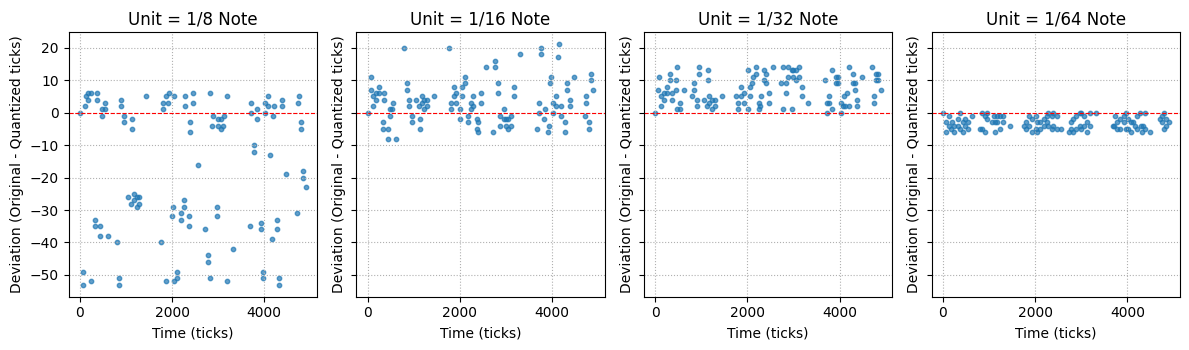

In [6]:
time_dev = [
    #  get_deviations(dataset[0], dataset[1]),
     get_deviations(dataset[0], dataset[2]),
     get_deviations(dataset[0], dataset[3]),
     get_deviations(dataset[0], dataset[4]),
     get_deviations(dataset[0], dataset[5]),
     # get_deviations(dataset[0], dataset[6])
]

fig2, axs2 = plt.subplots(1, len(time_dev), figsize=(12, 4), sharey=True)
# fig2.suptitle('Figure 2: Timing Deviation Introduced by Quantization', fontsize=14)

for i, (times, dev) in enumerate(time_dev) :
    axs2[i].scatter(times, dev, alpha=0.7, s=10)
    axs2[i].set_title(f"Unit = 1/{8 * (2 ** i)} Note")
    axs2[i].set_xlabel("Time (ticks)")
    axs2[i].set_ylabel("Deviation (Original - Quantized ticks)")
    axs2[i].axhline(0, color='red', linestyle='--', linewidth=0.8)
    axs2[i].grid(True, linestyle=':')

plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.savefig("../figure/figure_timing_deviation.pdf", format="pdf", bbox_inches='tight') 
plt.savefig("../figure/figure_timing_deviation.png", format="png", bbox_inches='tight') 
# plt.show()

In [7]:
abs_times = np.cumsum(mid.times)
abs_times_quant_4 = np.cumsum(mid_q4.times)
MAE_q4 = np.mean(abs(abs_times - abs_times_quant_4))
print(f"Mean Absolute Error(quantized 1/4 note)={MAE_q4:.2f}")

Mean Absolute Error(quantized 1/4 note)=28.61


In [8]:
abs_times = np.cumsum(mid.times)
for i, _mid in enumerate([mid_q4, mid_q8, mid_q16, mid_q32, mid_q64, mid_q128, mid_q256]) :
    abs_times_quant = np.cumsum(_mid.times)
    MAE = np.mean(abs(abs_times - abs_times_quant))
    print(f"Mean Absolute Error(quantized 1/{4*(2**(i))} note)={MAE:.2f}")

Mean Absolute Error(quantized 1/4 note)=28.61
Mean Absolute Error(quantized 1/8 note)=16.26
Mean Absolute Error(quantized 1/16 note)=6.17
Mean Absolute Error(quantized 1/32 note)=3.75
Mean Absolute Error(quantized 1/64 note)=1.69
Mean Absolute Error(quantized 1/128 note)=0.70
Mean Absolute Error(quantized 1/256 note)=0.00
